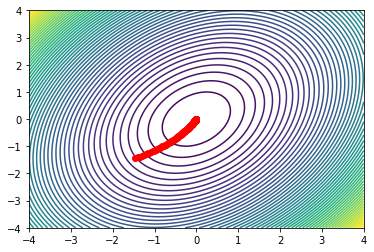

results of f_min:  1.04511186177e-37   number of iterations:   10001
[-1.45882457 -1.43735826] 1.22853743517
[ -4.28598671e-19  -4.13352078e-19] 1.04511186177e-37


In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 31 14:52:00 2017

@author: dustinscarter
"""

#Write a program to find the minium of $$ f(x,y) = x^2/2 + y^2/3 - xy/4 $$
#1, from your own code (except Monte Carlo)
#2, from scipy

import numpy as np
import matplotlib.pyplot as plt



def f2(x): #complex function with 2 minimum
    return x[0]**2/2 + x[1]**2/3 - x[0]*x[1]/4 
    #return (1-x[0])**2 + 100*(x[1]-x[0]**2)**2

#def f2(x):
#    p = np.exp(-(x[0]/4-x[1]/1)**2)
#    return p

def init(x_min, x_max, y_min, y_max):
    x0 = x_min+np.random.random()*(x_max-x_min)
    y0 = y_min+np.random.random()*(y_max-y_min)
    return [x0, y0]

x_min, x_max = -4, 4
y_min, y_max = -4, 4                   

nx = np.linspace(x_min,x_max,400)
ny = np.linspace(y_min,y_max,400)


# variable stepwidth
def derivative2(f, xy, d=0.01):
    x, y = xy[0], xy[1]
    fx = (f([x+d/2,y])-f([x-d/2,y]))/d
    fy = (f([x,y+d/2])-f([x,y-d/2]))/d
    #print(fx,fy)
    return np.array([fx,fy])

def minimize_fix(f,x0, N=10000):
    """
    x0: 1*2 array
    """
    
    x_now = x0
    converged = False
    x_hist = []
    x_hist.append(x_now)
    dx = 0.05

    for i in range(N):
        
        df_now = derivative2(f, x_now) 
        x_next = x_now - df_now*dx
        
        #print("step:    ", f(x_now), f(x_next))
        if f(x_next)>f(x_now):
            converged = True
            break
        else:
            x_now = x_next
            x_hist.append(x_now)

    return converged, np.array(x_hist), f(x_now)

[x0, y0] = init(x_min, x_max, y_min, y_max)
converged, x_hist, f_min = minimize_fix(f2, [x0,y0])
x,y = np.meshgrid(nx,ny)
z = f2([x, y])
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.3)
plt.contour(x,y,z, levels=levels)

plt.plot(x_hist[:,0], x_hist[:,1], 'ro-')
plt.show()
print('results of f_min: ', f_min, '  number of iterations:  ', len(x_hist))
print(x_hist[0], f2(x_hist[0]))
print(x_hist[-1], f2(x_hist[-1]))

def minimize_var(f,x0, N=1000):
    """
    x0: 1*2 array
    """
    
    x_now = x0
    x_prev = None
    converged = False
    x_hist = []
    x_hist.append(x_now)
    for i in range(N):
        
        df_now = derivative2(f2, x_now) 
        
        if x_prev is None:
            dx = 0.01
        else:
            df_prev = derivative2(f2, x_prev)
            dd = df_now - df_prev
            dx = np.dot(x_now - x_prev, dd) / (np.linalg.norm(dd))**2
        x_next = x_now - df_now*dx
        
        print("step:    ", f(x_now), f(x_next))
        if f(x_next)>f(x_now):
            converged = True
            break
        else:
            x_prev = x_now
            x_now = x_next
            x_hist.append(x_now)

    return converged, np.array(x_hist), f(x_now)

In [2]:
from scipy.optimize import minimize

[x0, y0] = init(x_min, x_max, y_min, y_max)
res = minimize(f2, [x0,y0], method='nelder-mead', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 43
         Function evaluations: 82
